<a href="https://colab.research.google.com/github/data-analyst-guy/Churn-Prediction-ML/blob/main/Pham_Manh_Sang_ML_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.xlsx to churn_prediction.xlsx


# **Data Processing**

In [ ]:
import io
data = pd.read_excel('churn_prediction.xlsx')
# Hiển thị các hàng đầu tiên của DataFrame
print(data.head())


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [ ]:
df = data

In [ ]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
def count_NaN_values(df):
    """
    Hàm để đếm số lượng giá trị NaN trong DataFrame.

    Tham số:
    df (pandas.DataFrame): DataFrame để đếm giá trị NaN.
    """
    # Đếm số lượng giá trị NaN trong DataFrame
    nan_dict = {}

    for col in df.columns:
        num_NaN = df[col].isna().sum()
        nan_dict[col] = num_NaN

    NaN_table = pd.DataFrame.from_dict(nan_dict, orient='index', columns=['Number of NaN']).reset_index()
    NaN_table.rename(columns={'index': 'Column'}, inplace=True)
    print(NaN_table)

In [ ]:
def NaN_column(df):
    """
    Hàm trả ra list cột có NaN values.

    Tham số:
    df (pandas.DataFrame): DataFrame để kiểm tra giá trị NaN.
    """
    list_nan_col = []
    for col in df.columns:
        if df[col].isna().sum() > 0:
            list_nan_col.append(col)
    return list_nan_col

In [ ]:
def identify_column_types(df):
    """
    Hàm để xác định các cột dạng số và dạng category trong DataFrame.

    Tham số:
    df (pandas.DataFrame): DataFrame để xác định loại cột.

    Trả về:
    tuple: Gồm hai danh sách, danh sách các cột số và danh sách các cột category.
    """
    # Danh sách các cột dạng số
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Danh sách các cột dạng category
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # In ra các cột dạng số và category
    print("Các cột dạng numerical:", numerical_cols)
    print("Các cột dạng category:", categorical_cols)

    return numerical_cols, categorical_cols

In [ ]:
numerical_cols, categorical_cols = identify_column_types(df)


Các cột dạng numerical: ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Các cột dạng category: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


## **Check imbalanced data**

In [ ]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

Data hơi imbalanced, cân nhắc dùng **SMOTE** nếu kết quả không như mong muốn

## **Handle values**

In [ ]:
count_NaN_values(df)

                         Column  Number of NaN
0                    CustomerID              0
1                         Churn              0
2                        Tenure            264
3          PreferredLoginDevice              0
4                      CityTier              0
5               WarehouseToHome            251
6          PreferredPaymentMode              0
7                        Gender              0
8                HourSpendOnApp            255
9      NumberOfDeviceRegistered              0
10             PreferedOrderCat              0
11            SatisfactionScore              0
12                MaritalStatus              0
13              NumberOfAddress              0
14                     Complain              0
15  OrderAmountHikeFromlastYear            265
16                   CouponUsed            256
17                   OrderCount            258
18            DaySinceLastOrder            307
19               CashbackAmount              0


--> Data có một số cột có hàng trống

In [ ]:
# Xử lý đối với cột Tenure
import seaborn as sns
import matplotlib.pyplot as plt

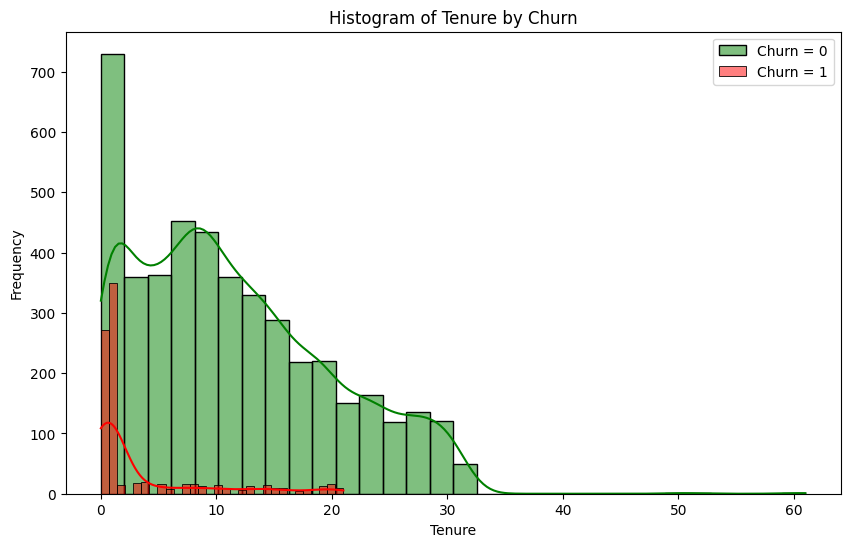

In [ ]:
# Lọc dữ liệu cho churn = 0 và churn = 1
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]


column_to_plot = 'Tenure'

# Vẽ histogram chồng nhau
plt.figure(figsize=(10, 6))
sns.histplot(churn_0[column_to_plot], color='green', label='Churn = 0', kde=True, bins=30)
sns.histplot(churn_1[column_to_plot], color='red', label='Churn = 1', kde=True, bins=30)

# Thêm tiêu đề và nhãn
plt.title(f'Histogram of {column_to_plot} by Churn')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Thay thế các giá trị trống bằng giá trị 0
df['Tenure'] = df['Tenure'].fillna(0)

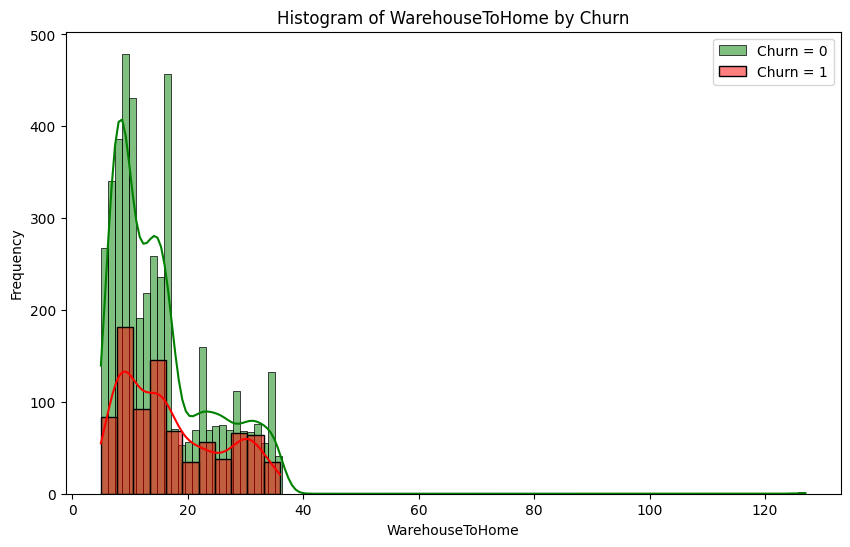

In [ ]:
# Xử lý đối với cột WarehousetoHome
# Lọc dữ liệu cho churn = 0 và churn = 1
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]


column_to_plot = 'WarehouseToHome'

# Vẽ histogram chồng nhau
plt.figure(figsize=(10, 6))
sns.histplot(churn_0[column_to_plot], color='green', label='Churn = 0', kde=True)
sns.histplot(churn_1[column_to_plot], color='red', label='Churn = 1', kde=True)

# Thêm tiêu đề và nhãn
plt.title(f'Histogram of {column_to_plot} by Churn')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Thay thế các giá trị trống bằng giá trị mean
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean())

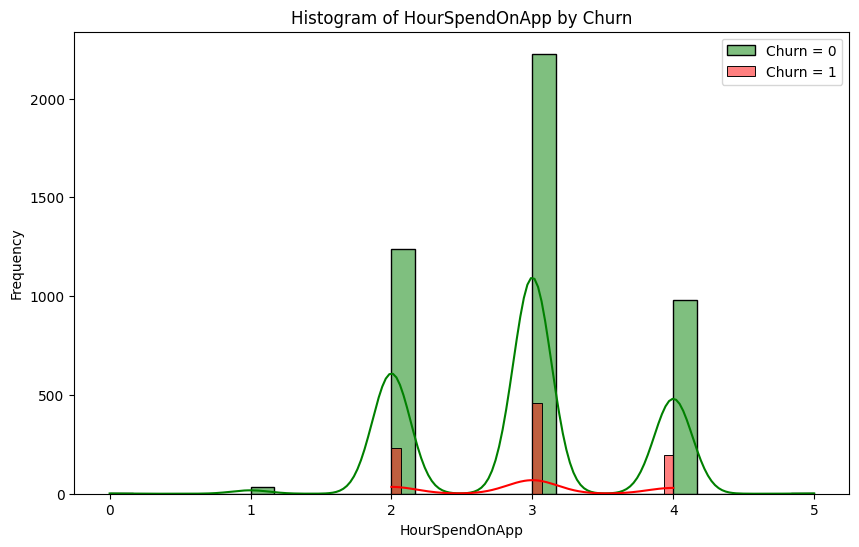

In [ ]:
# Xử lý đối với cột WarehousetoHome
# Lọc dữ liệu cho churn = 0 và churn = 1
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]


column_to_plot = 'HourSpendOnApp'

# Vẽ histogram chồng nhau
plt.figure(figsize=(10, 6))
sns.histplot(churn_0[column_to_plot], color='green', label='Churn = 0', kde=True, bins=30)
sns.histplot(churn_1[column_to_plot], color='red', label='Churn = 1', kde=True, bins=30)

# Thêm tiêu đề và nhãn
plt.title(f'Histogram of {column_to_plot} by Churn')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Thay thế các giá trị trống bằng giá trị mean
# Tuy nhiên khi kiểm tra các giá trị chỉ nhận là số nguyên, nên số mean là 2,93 được làm tròn thành 3
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(3)

In [ ]:
list_nan_col = NaN_column(df)
df[list_nan_col].head()

,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,11.0,1.0,1.0,5.0
1,15.0,0.0,1.0,0.0
2,14.0,0.0,1.0,3.0
3,23.0,0.0,1.0,3.0
4,11.0,1.0,1.0,3.0


In [ ]:
list_nan_col

['OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

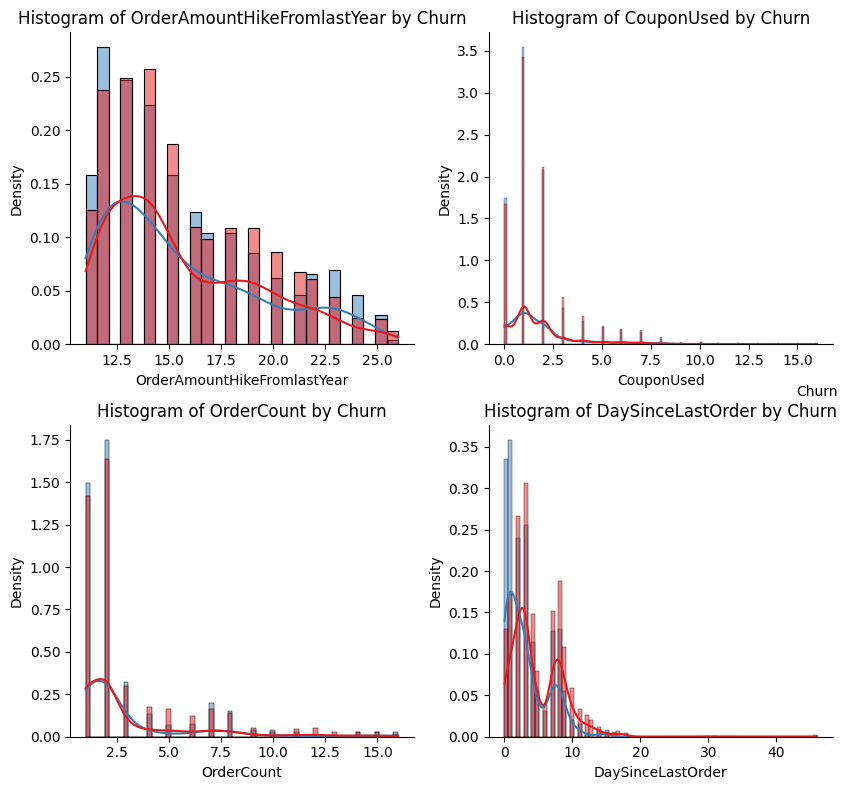

In [ ]:
# Lọc dữ liệu cho churn = 0 và churn = 1
churn_0 = df[df['Churn'] == 0]
churn_1 = df[df['Churn'] == 1]
list_nan_col = ['OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']


# Tạo lưới biểu đồ
g = sns.FacetGrid(pd.melt(df, id_vars='Churn', value_vars=list_nan_col), col="variable", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x='value', hue='Churn', kde=True, stat='density', common_norm=False, palette='Set1')

# Thêm tiêu đề và nhãn cho mỗi biểu đồ
for ax, column in zip(g.axes.flat, list_nan_col):
    ax.set_title(f'Histogram of {column} by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

# Thêm legend cho mỗi biểu đồ
g.add_legend(title='Churn')

plt.tight_layout()
plt.show()

In [ ]:
# Thay thế các giá trị của 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount','DaySinceLastOrder'
# bằng giá trị mean
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean())
df['OrderCount'] = df['OrderCount'].fillna(df['OrderCount'].mean())
# bằng giá trị 0
df['CouponUsed'] = df['CouponUsed'].fillna(0)
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(0)

In [ ]:
# Loại bỏ dòng lặp
df_unique = df.drop_duplicates()
df_unique.count()

CustomerID                     5630
Churn                          5630
Tenure                         5630
PreferredLoginDevice           5630
CityTier                       5630
WarehouseToHome                5630
PreferredPaymentMode           5630
Gender                         5630
HourSpendOnApp                 5630
NumberOfDeviceRegistered       5630
PreferedOrderCat               5630
SatisfactionScore              5630
MaritalStatus                  5630
NumberOfAddress                5630
Complain                       5630
OrderAmountHikeFromlastYear    5630
CouponUsed                     5630
OrderCount                     5630
DaySinceLastOrder              5630
CashbackAmount                 5630
dtype: int64

## **Feature Engineering & EDA**

In [ ]:
# !pip install pandas-profiling

In [ ]:
# !pip install pandas-profiling[notebook]
# !pip install -U pandas-profiling

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# import pandas_profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title="data set", html={'style' : {'full_width':True}})
# profile.to_file(output_file="name of html file.html")

In [ ]:
# from google.colab import files

# Download the report
# files.download('name of html file.html')

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


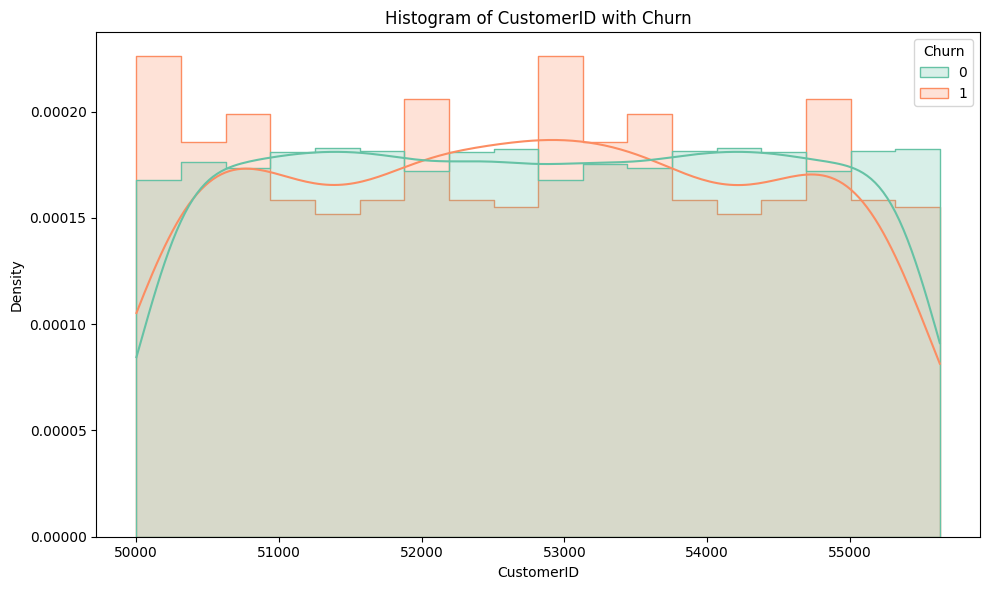

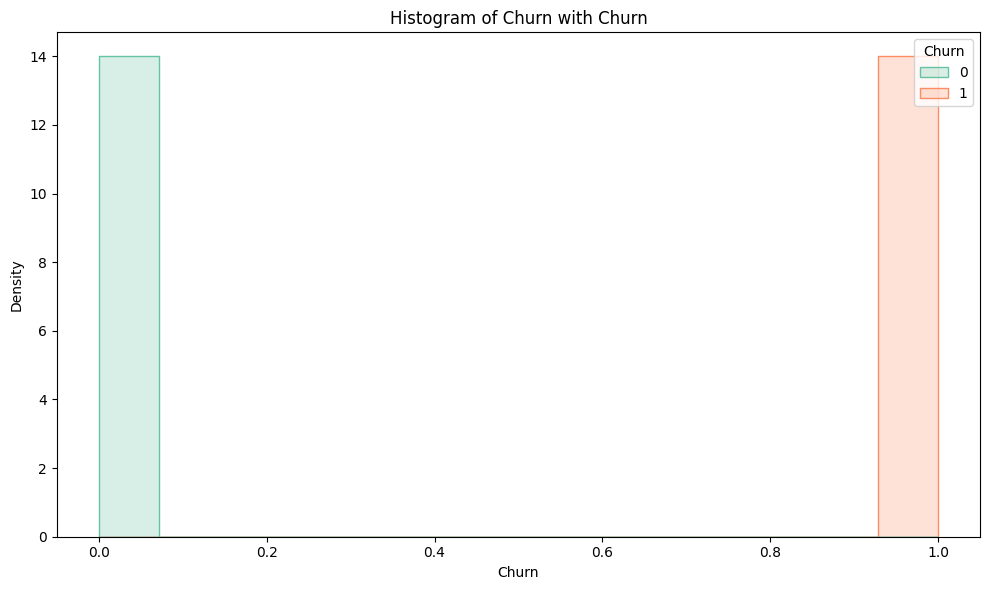

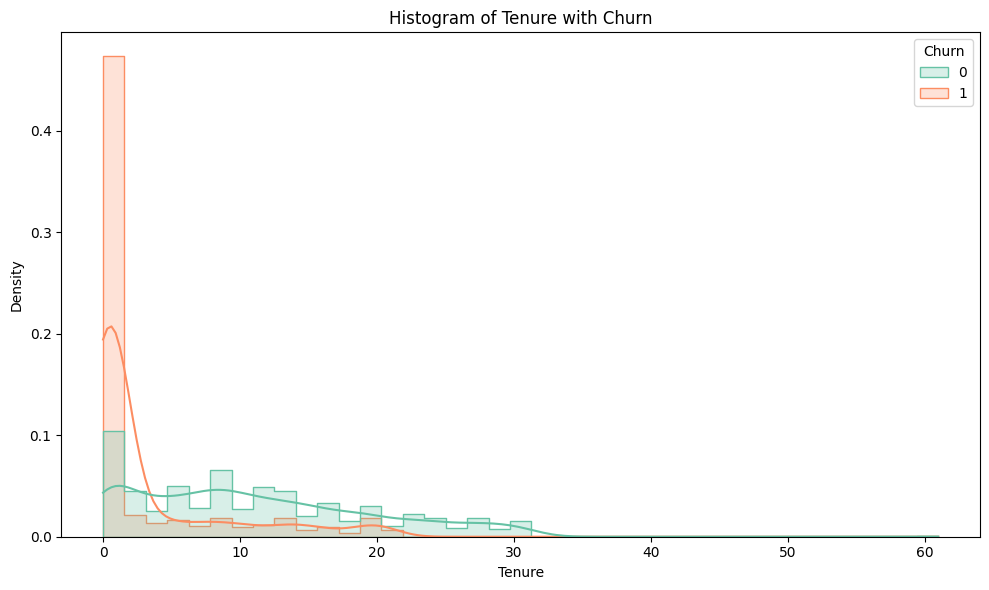

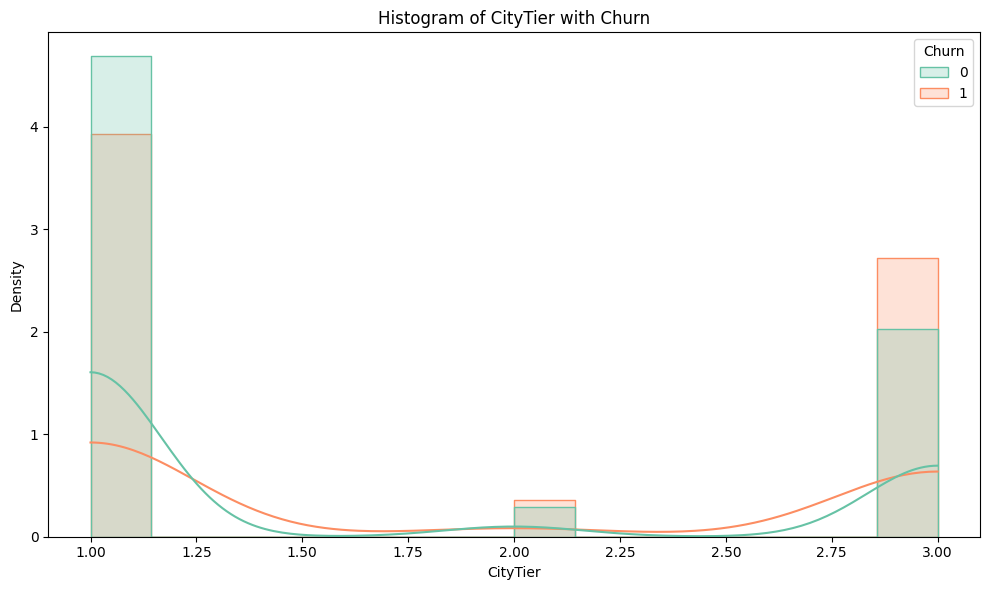

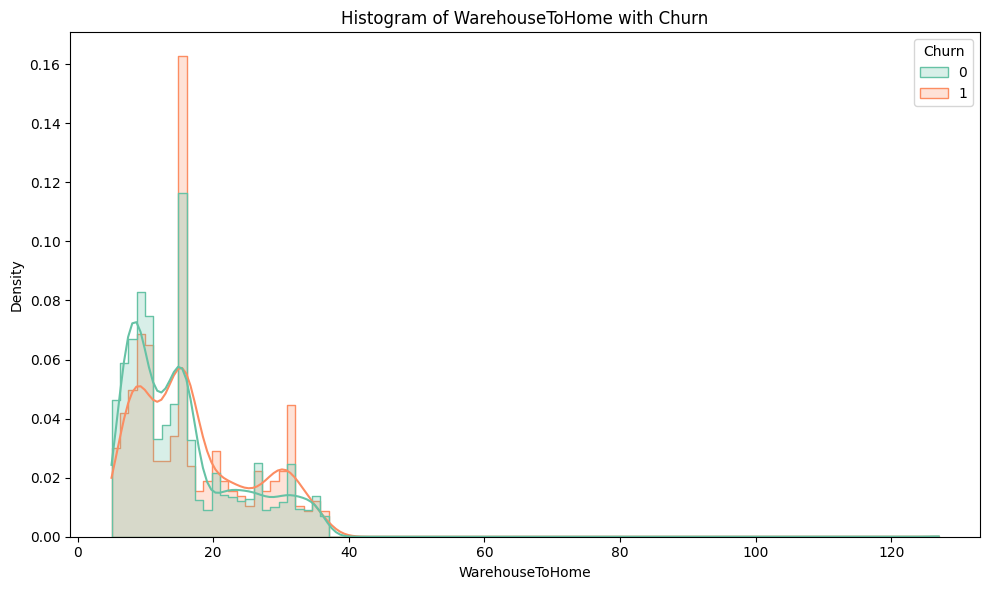

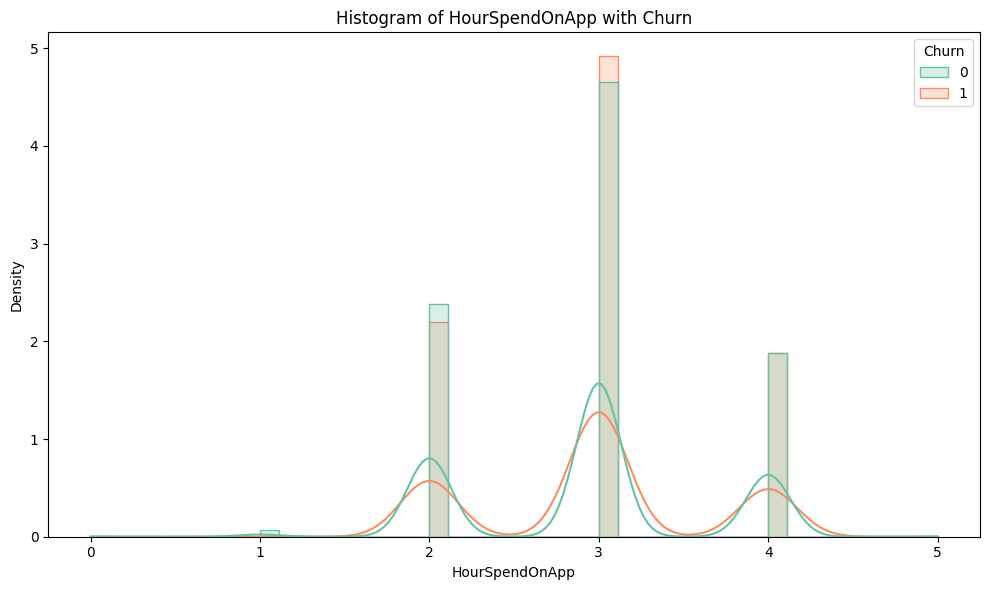

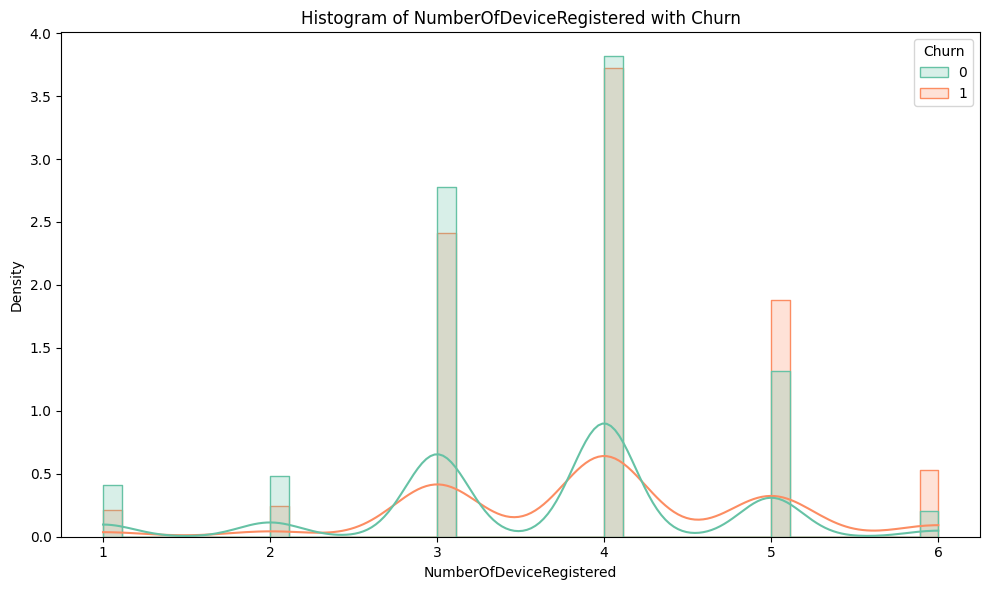

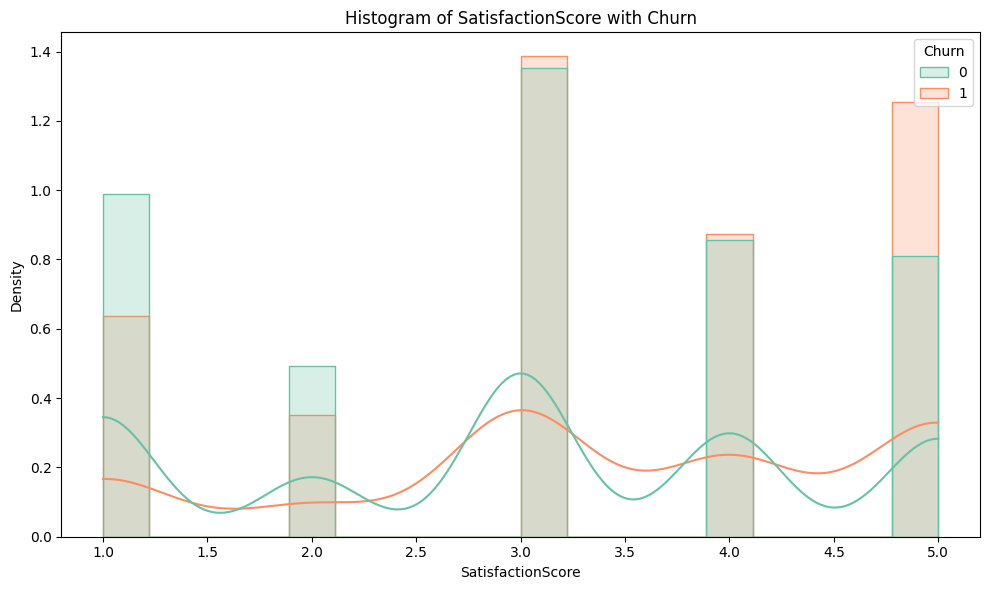

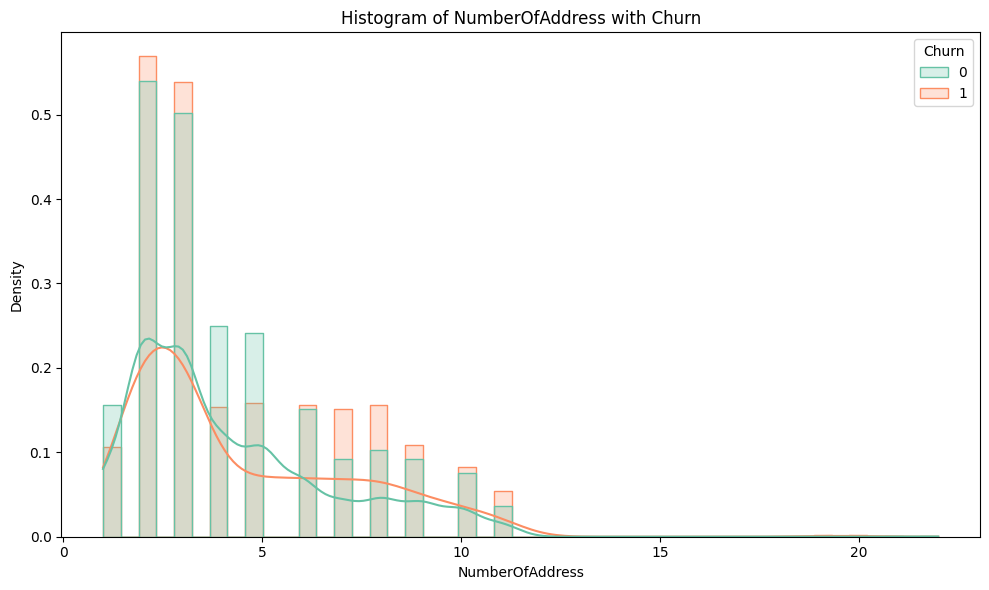

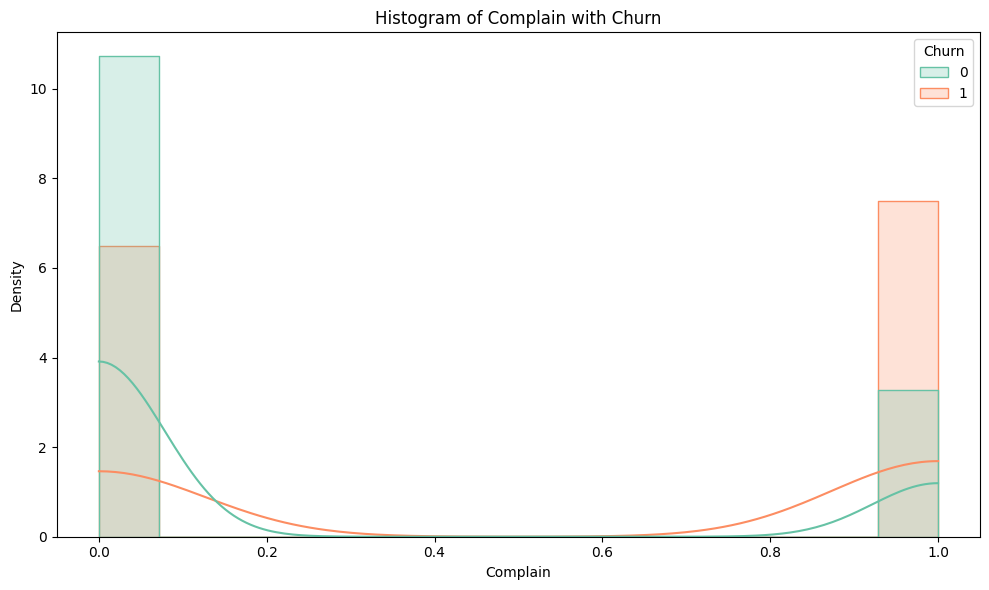

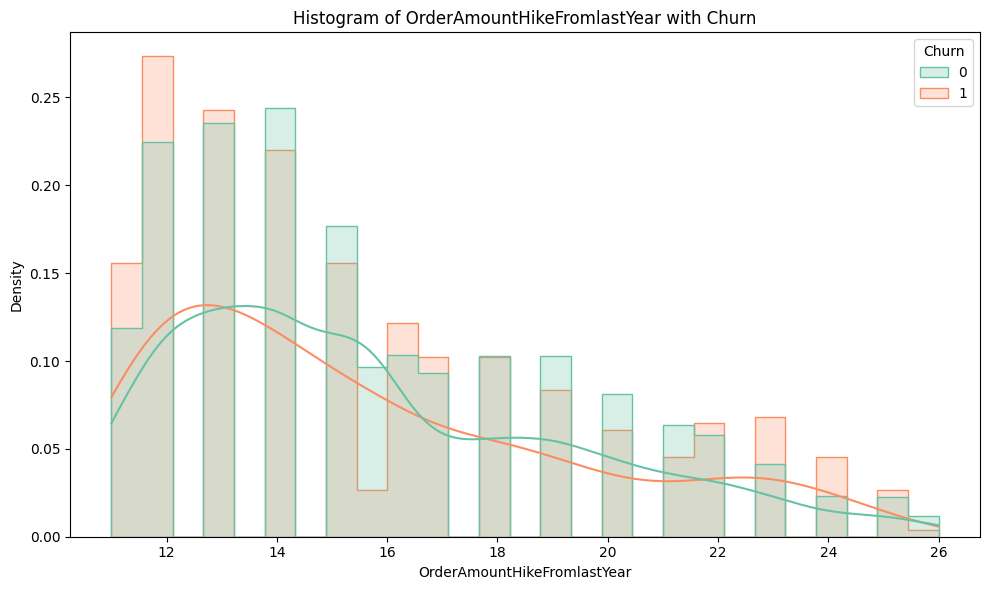

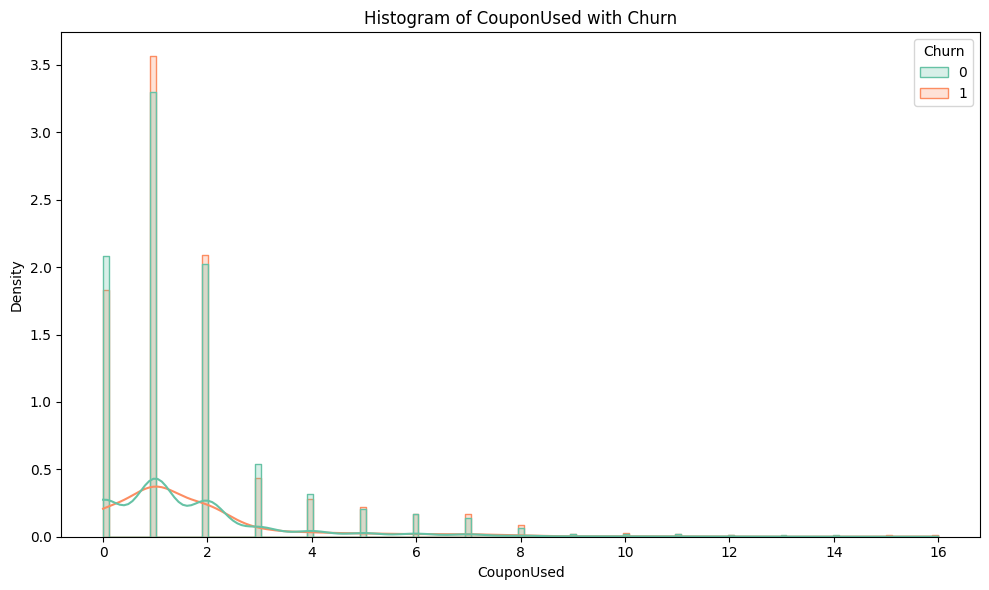

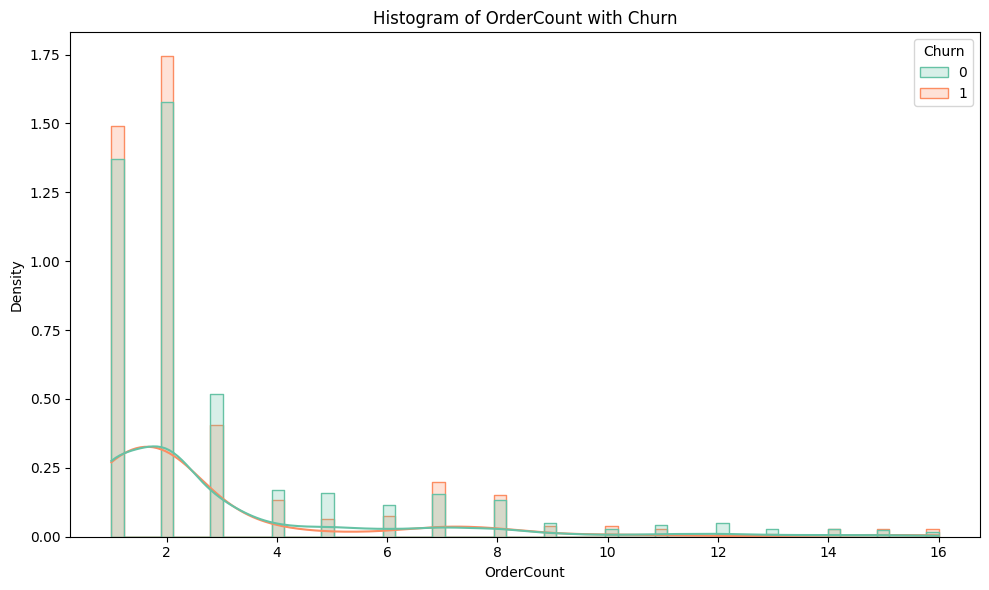

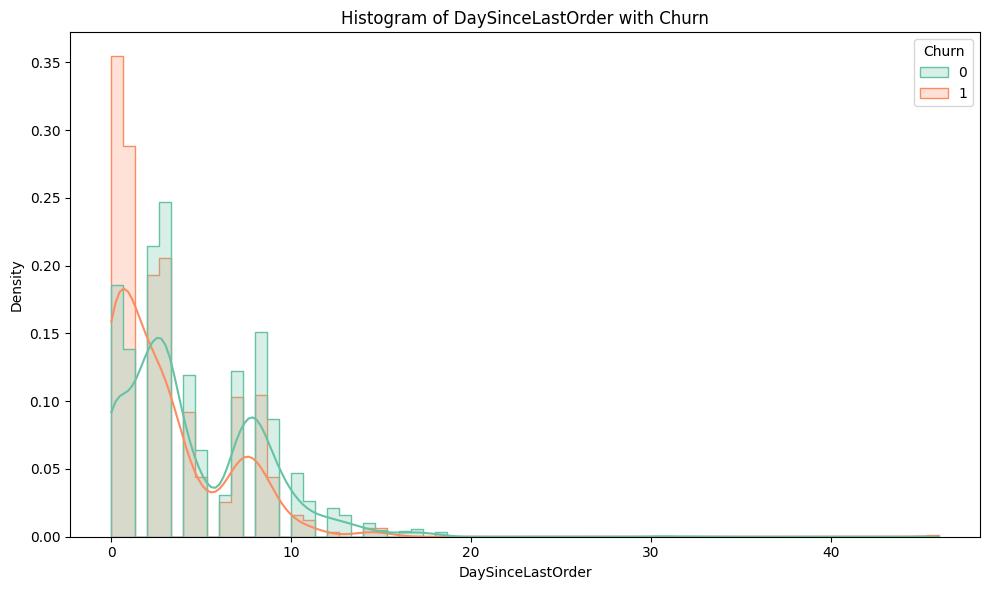

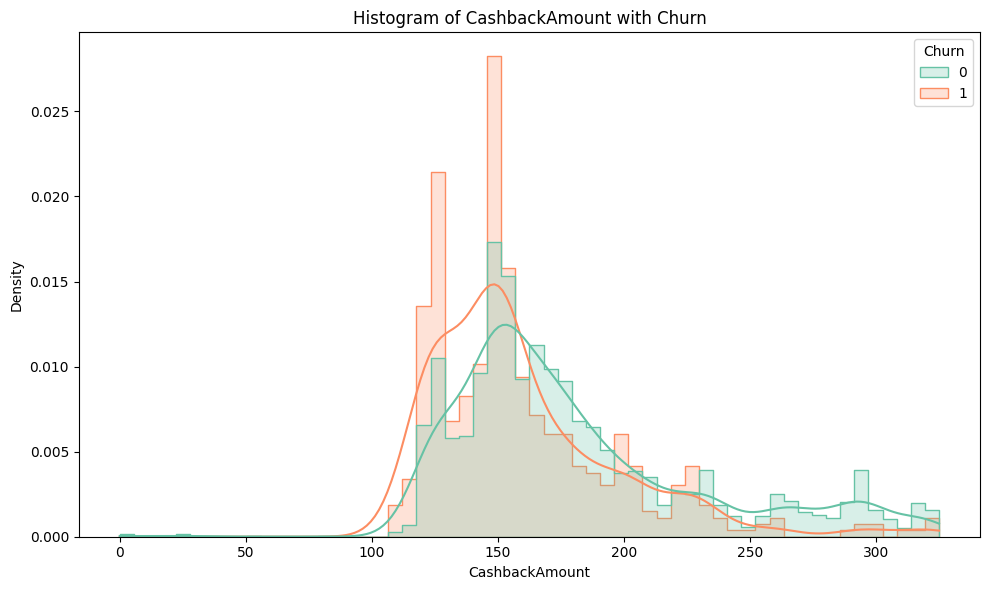

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df đã được định nghĩa và chứa các cột số trong numerical_cols_for_check và cột is_fraud
# df = pd.read_csv('your_dataframe.csv')

for col in numerical_cols:
    plt.figure(figsize=(10, 6))

    # Vẽ histogram cho mỗi cột số phân chia theo biến is_fraud
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='Set2', element='step', stat='density', common_norm=False)

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Histogram of {col} with Churn')
    plt.tight_layout()
    plt.show()


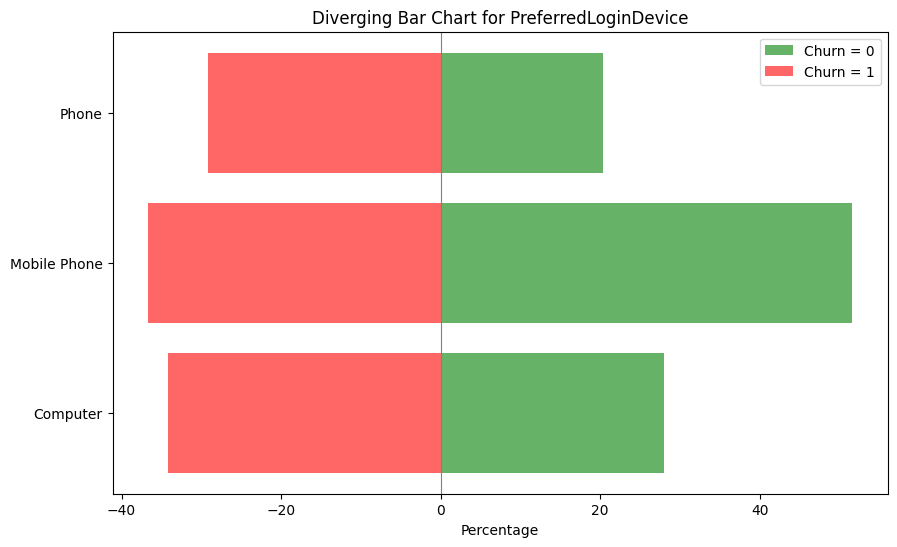

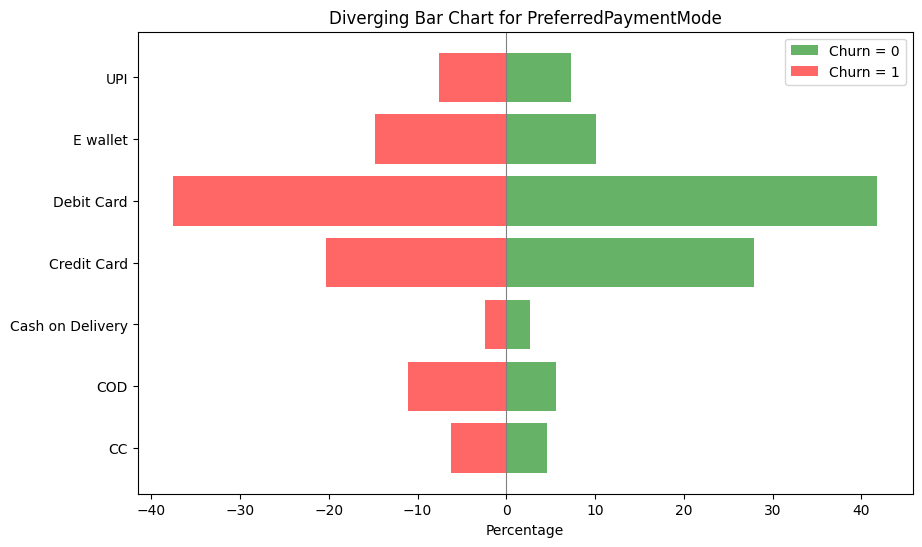

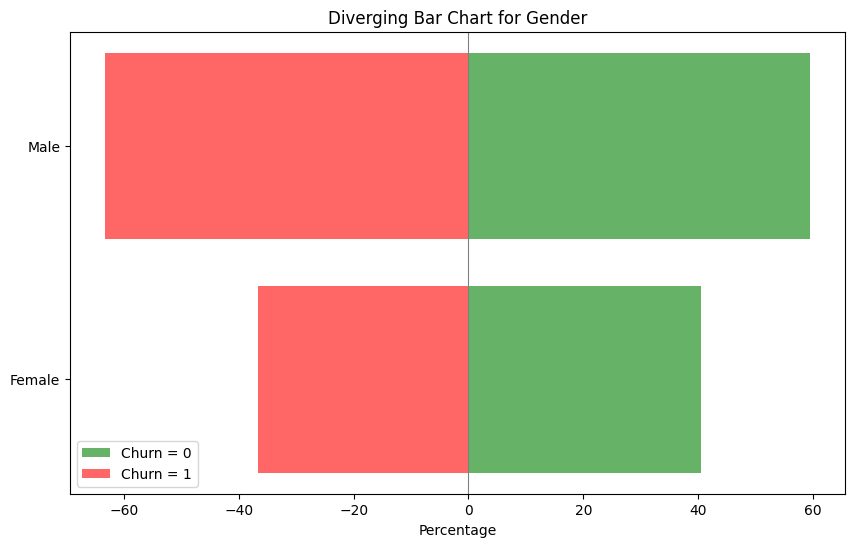

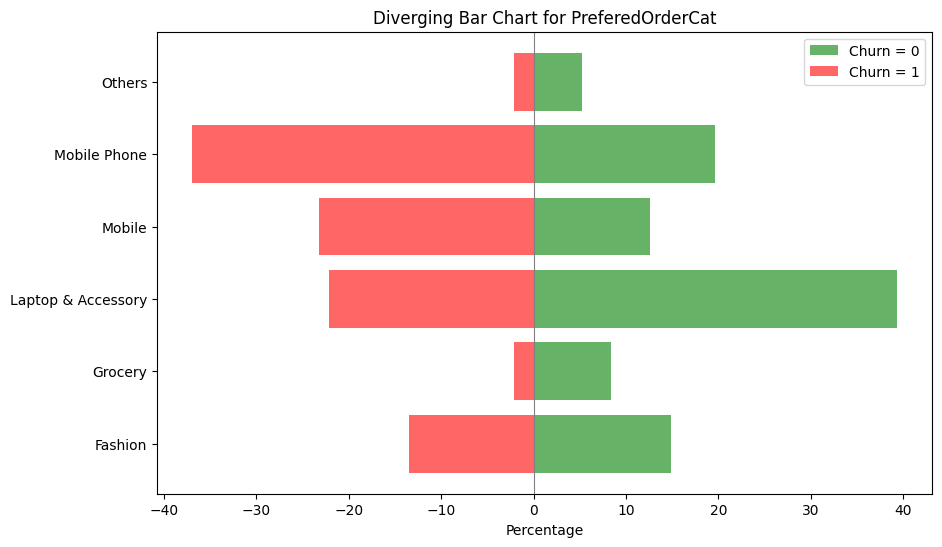

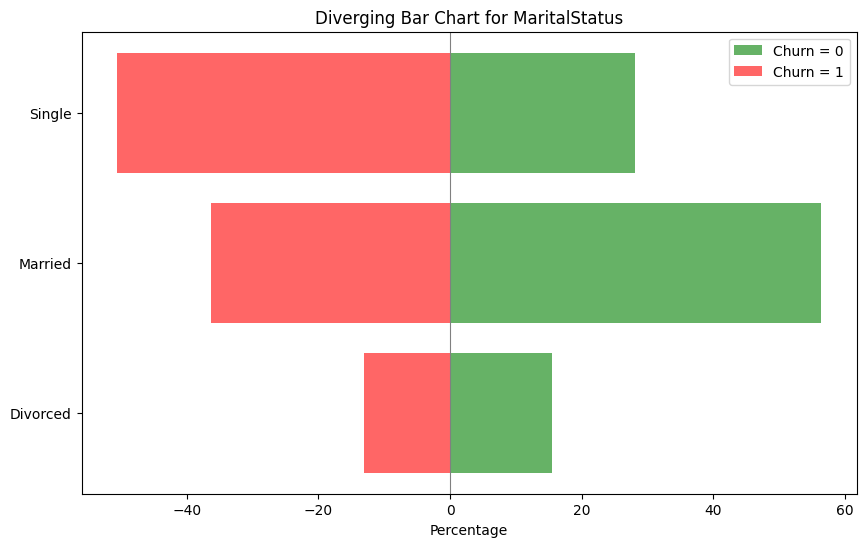

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to plot diverging bar chart
def plot_diverging_bar_chart(df, categorical_cols, target):
    for col in categorical_cols:
        # Create a cross-tabulation of counts normalized by columns to get percentages
        cross_tab = pd.crosstab(df[col], df[target], normalize='columns') * 100

        # Ensure both churn values (0 and 1) are present in the columns
        if 0 not in cross_tab.columns:
            cross_tab[0] = 0
        if 1 not in cross_tab.columns:
            cross_tab[1] = 0

        cross_tab = cross_tab[[0, 1]]  # Ensure the order of columns is [0, 1]

        # Plotting
        fig, ax = plt.subplots(figsize=(10, 6))

        # Plot bars for churn = 0
        bars0 = ax.barh(cross_tab.index, cross_tab[0], color='green', alpha=0.6, label='Churn = 0')

        # Plot bars for churn = 1
        bars1 = ax.barh(cross_tab.index, -cross_tab[1], color='red', alpha=0.6, label='Churn = 1')

        ax.set_title(f'Diverging Bar Chart for {col}')
        ax.set_xlabel('Percentage')
        ax.axvline(0, color='grey', linewidth=0.8)
        ax.legend()
        plt.show()

# Plot the charts
plot_diverging_bar_chart(df, categorical_cols, 'Churn')


# **Feature Transforming**

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## **Categorical Columns**

In [ ]:
for c in categorical_cols:
    print(f"{c}: {df[c].unique()}")

PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


Data không có quan hệ thứ bậc, sử dụng one-hot encoding để chuyển đổi

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Định nghĩa ColumnTransformer với OneHotEncoder cho các cột phân loại
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Giữ lại các cột không được mã hóa
)

# Áp dụng OneHotEncoder
df_encoded = preprocessor.fit_transform(df)

# Chuyển đổi thành DataFrame
df_encoded = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())

# Loại bỏ tiền tố 'remainder__' trong tên các cột
df_encoded.columns = [col.replace('remainder__', '') for col in df_encoded.columns]

print(df_encoded.columns)


Index(['cat__PreferredLoginDevice_Computer',
       'cat__PreferredLoginDevice_Mobile Phone',
       'cat__PreferredLoginDevice_Phone', 'cat__PreferredPaymentMode_CC',
       'cat__PreferredPaymentMode_COD',
       'cat__PreferredPaymentMode_Cash on Delivery',
       'cat__PreferredPaymentMode_Credit Card',
       'cat__PreferredPaymentMode_Debit Card',
       'cat__PreferredPaymentMode_E wallet', 'cat__PreferredPaymentMode_UPI',
       'cat__Gender_Female', 'cat__Gender_Male',
       'cat__PreferedOrderCat_Fashion', 'cat__PreferedOrderCat_Grocery',
       'cat__PreferedOrderCat_Laptop & Accessory',
       'cat__PreferedOrderCat_Mobile', 'cat__PreferedOrderCat_Mobile Phone',
       'cat__PreferedOrderCat_Others', 'cat__MaritalStatus_Divorced',
       'cat__MaritalStatus_Married', 'cat__MaritalStatus_Single', 'CustomerID',
       'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain

## **Numerical Columns**

In [ ]:
df[numerical_cols].columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# Bỏ cột CustomerID khỏi mô hình
df_encoded = df_encoded.drop('CustomerID', axis=1)

In [ ]:
# Bỏ phần Churn/CustomerID khỏi categorical_cols
numerical_cols.remove('Churn')
numerical_cols.remove('CustomerID')

In [ ]:
# Tenure: Box Cox
# CityTier: Giữ nguyên
# WarehouseToHome: Box Cox
# HourSpendonApp: Giữ nguyên
# NumberOfDeviceRegistered: Giữ nguyên
# SatisfactionScore: Giữ nguyên
# NumberOfAddress: giữ nguyên
# Complain: giữ nguyên
# OrderAmountHikeFromlastYear: giữ nguyên
# CouponUsed: giữ nguyên
# OrderCount: giữ nguyên
# DaySinceLastOrder: giữ nguyên
# CashbackAmount: Standard Scale

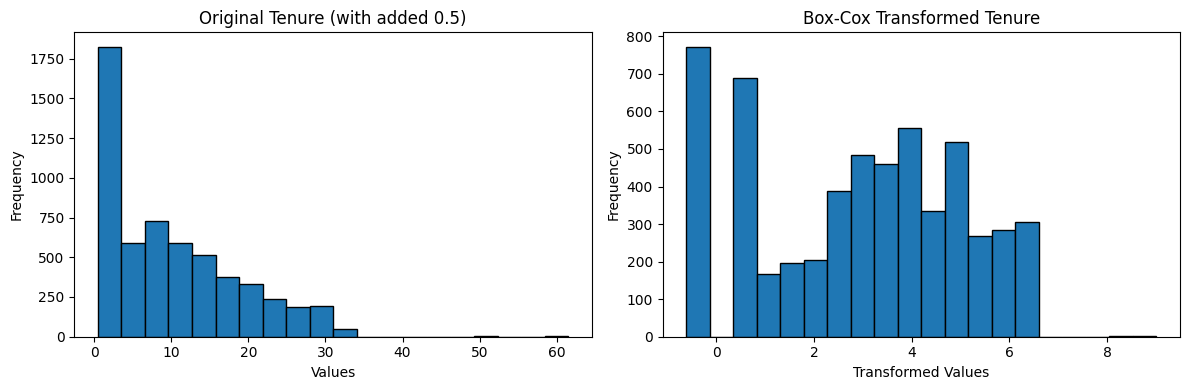

Lambda value used for transformation: 0.3409753923500345


In [ ]:
# Step 1: Add a small value (e.g., 0.5) to all values to handle zeros or negative values
from scipy import stats

test = df['Tenure'] + 0.5

# Step 2: Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(test)

# Create a new DataFrame to store transformed values
df_transformed = df_encoded.copy()
df_transformed['Tenure_transformed'] = transformed_data

# Step 3: Visualize the transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot original data
ax[0].hist(test, bins=20, edgecolor='black')
ax[0].set_title('Original Tenure (with added 0.5)')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

# Plot transformed data
ax[1].hist(transformed_data, bins=20, edgecolor='black')
ax[1].set_title('Box-Cox Transformed Tenure')
ax[1].set_xlabel('Transformed Values')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Lambda value used for transformation: {lambda_value}")

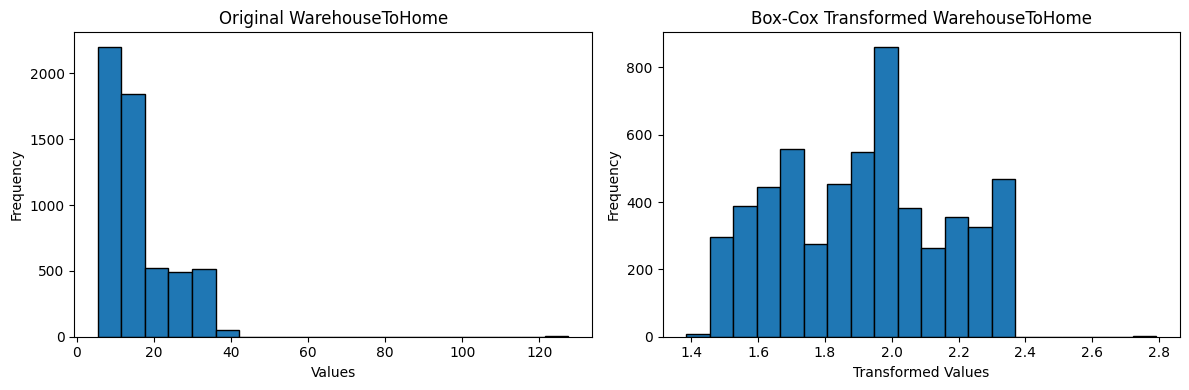

Lambda value used for transformation: -0.2531499559683009


In [ ]:
from scipy import stats
# Option 1: Add a small value (e.g., 0.5) to all values to handle zeros
test = df['WarehouseToHome'] + 0.5

# Option 2: Log transformation for zeros (if applicable)
# test = np.log1p(df['WarehouseToHome'])

# Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(test)

# Create a new DataFrame to store transformed values

df_transformed['WarehouseToHome_transformed'] = transformed_data

# Visualize the transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot original data
ax[0].hist(test, bins=20, edgecolor='black')
ax[0].set_title('Original WarehouseToHome')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

# Plot transformed data
ax[1].hist(transformed_data, bins=20, edgecolor='black')
ax[1].set_title('Box-Cox Transformed WarehouseToHome')
ax[1].set_xlabel('Transformed Values')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Lambda value used for transformation: {lambda_value}")


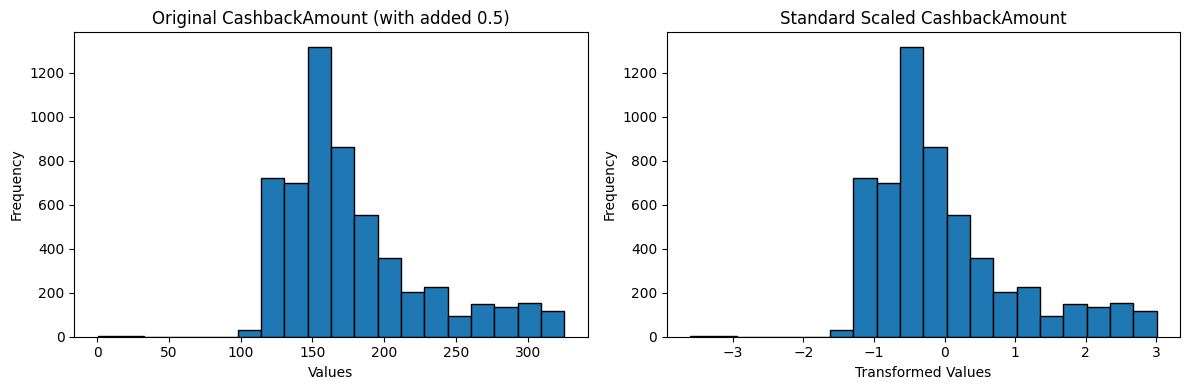

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming df_encoded is your DataFrame and 'CashbackAmount' is the column of interest

# Step 1
test = df_encoded['CashbackAmount'] + 0.5

# Step 2: Initialize StandardScaler
scaler = StandardScaler()

# Step 3: Reshape the data for StandardScaler and apply the transformation
test_transformed = scaler.fit_transform(test.values.reshape(-1, 1))

# Create a new DataFrame to store transformed values

df_transformed['CashbackAmount_transformed'] = test_transformed

# Step 4: Visualize the transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot original data
ax[0].hist(test, bins=20, edgecolor='black')
ax[0].set_title('Original CashbackAmount (with added 0.5)')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

# Plot transformed data
ax[1].hist(test_transformed, bins=20, edgecolor='black')
ax[1].set_title('Standard Scaled CashbackAmount')
ax[1].set_xlabel('Transformed Values')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
drop_columns = ['Tenure', 'WarehouseToHome', 'CashbackAmount']
df_transformed = df_transformed.drop(drop_columns, axis=1)

In [ ]:
df_transformed.columns

Index(['cat__PreferredLoginDevice_Computer',
       'cat__PreferredLoginDevice_Mobile Phone',
       'cat__PreferredLoginDevice_Phone', 'cat__PreferredPaymentMode_CC',
       'cat__PreferredPaymentMode_COD',
       'cat__PreferredPaymentMode_Cash on Delivery',
       'cat__PreferredPaymentMode_Credit Card',
       'cat__PreferredPaymentMode_Debit Card',
       'cat__PreferredPaymentMode_E wallet', 'cat__PreferredPaymentMode_UPI',
       'cat__Gender_Female', 'cat__Gender_Male',
       'cat__PreferedOrderCat_Fashion', 'cat__PreferedOrderCat_Grocery',
       'cat__PreferedOrderCat_Laptop & Accessory',
       'cat__PreferedOrderCat_Mobile', 'cat__PreferedOrderCat_Mobile Phone',
       'cat__PreferedOrderCat_Others', 'cat__MaritalStatus_Divorced',
       'cat__MaritalStatus_Married', 'cat__MaritalStatus_Single', 'Churn',
       'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUs

# **Apply Model**

In [ ]:
# Split data
X = df_transformed.drop('Churn', axis=1)
y = df_transformed['Churn']

In [ ]:
# Train/test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Random Forest**

Accuracy: 96.98%
Precision: 99.35%
Recall: 82.16%
roc_auc_score: 99.10%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       941
         1.0       0.99      0.82      0.90       185

    accuracy                           0.97      1126
   macro avg       0.98      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126



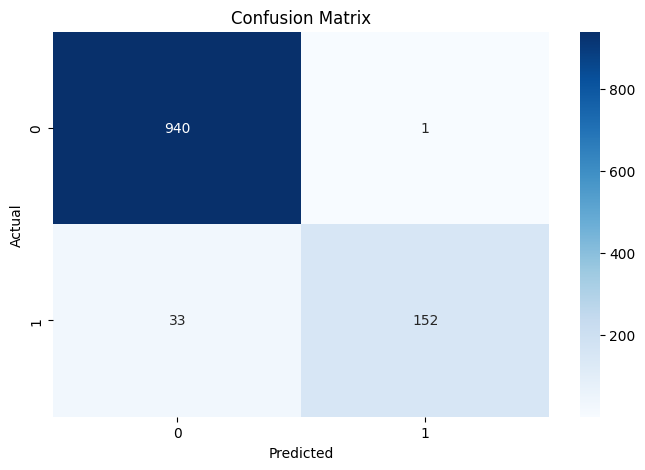

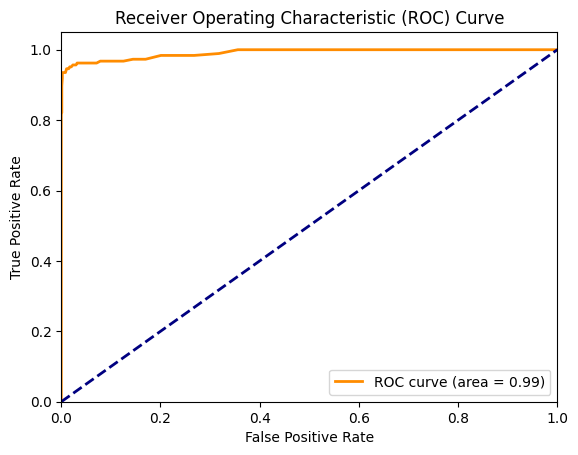

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score,classification_report, confusion_matrix,roc_auc_score
from sklearn.model_selection import cross_val_score

# Khởi tạo mô hình RandomForest
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
RF.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = RF.predict(X_test) # Số nguyên: {0,1}
y_pred_prob = RF.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho lớp dương tính, số lẻ

# Tính các chỉ số precision và recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# In kết quả
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'roc_auc_score: {roc_auc * 100:.2f}%')

# Bảng đánh giá classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Ma trận nhầm lẫn (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính FPR, TPR cho đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Tính AUC (Area Under the Curve
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Áp dụng k-fold cross-validation (vd: k=5) trên tập huấn luyện
cv_scores = cross_val_score(RF, X_train, y_train, cv=5)

# Chuyển đổi các điểm số từ dạng tỉ lệ sang phần trăm
cv_scores_percent = np.round(cv_scores * 100, 2)

# In kết quả đánh giá từng fold dưới dạng phần trăm
print("Cross-validation scores (%):", [f"{score:.2f}%" for score in cv_scores_percent])

# In trung bình và độ lệch chuẩn của các điểm số cross-validation dưới dạng phần trăm
print(f"Mean CV score (%): {np.mean(cv_scores_percent):.2f}% +/- {np.std(cv_scores_percent):.2f}%")

Cross-validation scores (%): ['94.23%', '94.45%', '95.23%', '94.01%', '96.89%']
Mean CV score (%): 94.96% +/- 1.05%


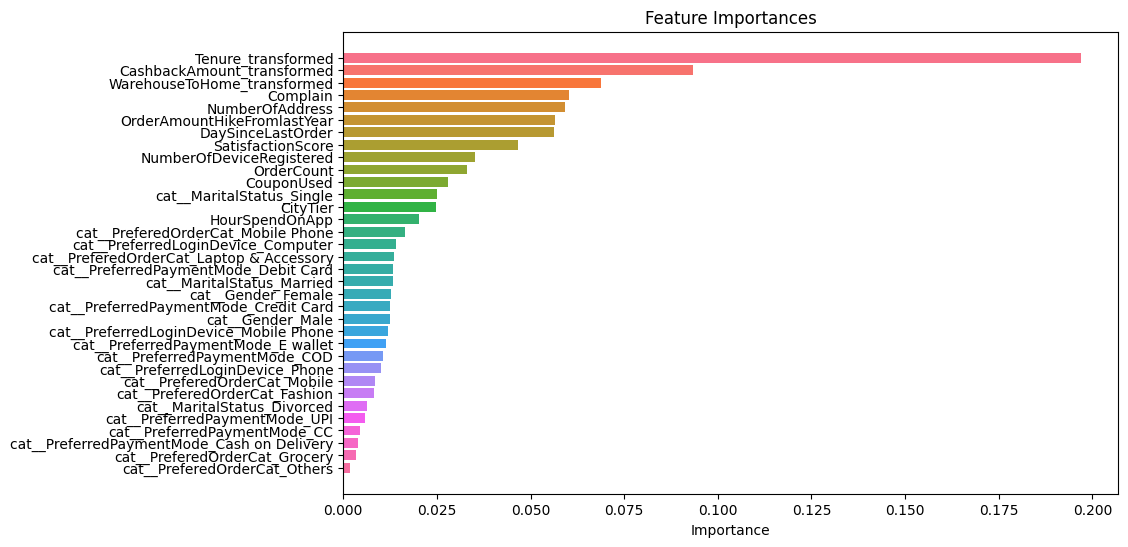

In [ ]:
# Get feature importances
importances = RF.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Define colors for the bars
palette = sns.color_palette("husl", n_colors=X_train.shape[1])  # Change "husl" to any other palette

# Plot horizontal bar chart with colored bars
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), importances[indices], color=palette)
plt.yticks(range(X_train.shape[1]), names)
plt.title("Feature Importances")
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top
plt.show()

Hiện tại do mức accuracy đã ở mức khá cao, tạm thời chưa cần hyperparameter tunning cho model, các mức default đang cho kết quả **khá tốt**

## **Logistic Regression**

Accuracy: 91.12%
Precision: 81.02%
Recall: 60.00%
ROC AUC Score: 90.66%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       941
         1.0       0.81      0.60      0.69       185

    accuracy                           0.91      1126
   macro avg       0.87      0.79      0.82      1126
weighted avg       0.91      0.91      0.91      1126



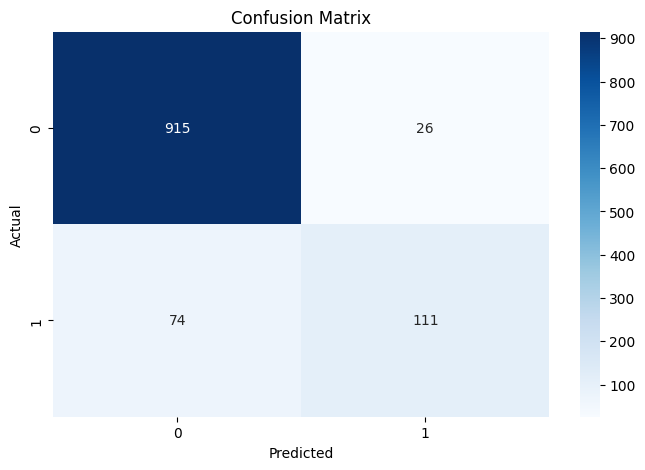

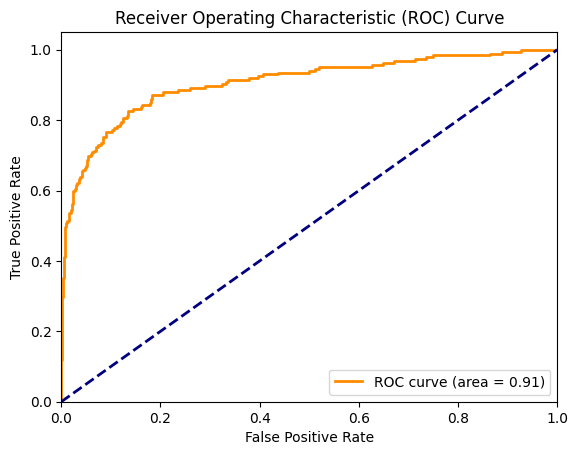

In [ ]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Huấn luyện mô hình
logreg.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = logreg.predict(X_test)  # Số nguyên: {0,1}
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho lớp dương tính, số lẻ

# Tính các chỉ số precision, recall, accuracy, và roc_auc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# In kết quả
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc * 100:.2f}%')

# Bảng đánh giá classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Ma trận nhầm lẫn (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính FPR, TPR cho đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Tính AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Khởi tạo mô hình Logistic Regression
logreg = LogisticRegression(random_state=42,max_iter = 1000)

# Định nghĩa grid của các tham số cần tìm kiếm
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced']
}

# Sử dụng GridSearchCV để tìm kiếm các tham số tốt nhất
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters found:", grid_search.best_params_)

# Dự đoán trên tập kiểm tra sử dụng mô hình tốt nhất
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Tính toán và in ra các chỉ số đánh giá
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found: {'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 91.03%
Precision: 80.43%
Recall: 60.00%
ROC AUC Score: 90.69%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver

In [ ]:
# Khởi tạo mô hình Logistic Regression với các tham số tốt nhất
best_params = {'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
logreg_tunning = LogisticRegression(**best_params, random_state=42, max_iter=1000)

# Thực hiện k-fold cross-validation
k = 5
cv_scores = cross_val_score(logreg_tunning, X_train, y_train, cv=k, scoring='accuracy')

# In kết quả
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')
print(f'Standard deviation of cross-validation scores: {cv_scores.std():.2f}')

Cross-validation scores: [0.88679245 0.87791343 0.89012209 0.90344062 0.88333333]
Mean cross-validation score: 0.89
Standard deviation of cross-validation scores: 0.01


<ipython-input-52-aedacc2de68f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df.head(10), palette='husl')


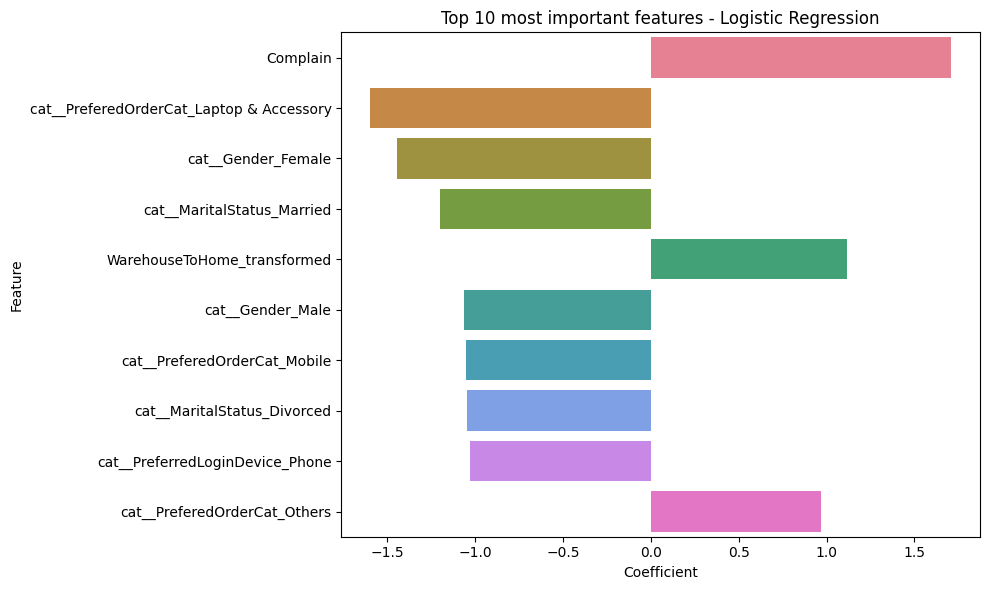

In [ ]:
# Khởi tạo mô hình Logistic Regression với các tham số tốt nhất
best_params = {'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
logreg_tunning = LogisticRegression(**best_params, random_state=42, max_iter=1000)

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
logreg_tunning.fit(X_train, y_train)

# Lấy các hệ số của mô hình Logistic Regression
coefficients = logreg_tunning.coef_[0]

# Lấy tên các đặc trưng
feature_names = X_train.columns

# Tạo DataFrame để hiển thị feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)  # Độ lớn tuyệt đối của hệ số
})

# Sắp xếp theo độ lớn tuyệt đối của hệ số
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Vẽ đồ thị cột cho các feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df.head(10), palette='husl')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 most important features - Logistic Regression')
plt.tight_layout()
plt.show()

Mô hình không perform tốt bằng RandomForest, dù sau khi GridSearch. Có lẽ cần chuẩn hóa thêm dữ liệu để cho kết quả tốt hơn. Độ quan trọng của kết quả mô hình LogReg cũng khác đáng kể so với RandomForest. Chúng ta sẽ xử lý vấn đề này sau

## **CatBoost**

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.2 MB/s eta 0:00:00


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8583481	test: 0.8552398	best: 0.8552398 (0)	total: 53.6ms	remaining: 53.5s
100:	learn: 0.9653641	test: 0.9458259	best: 0.9458259 (95)	total: 1.08s	remaining: 9.66s
200:	learn: 0.9935613	test: 0.9653641	best: 0.9662522 (185)	total: 1.66s	remaining: 6.59s
300:	learn: 0.9993339	test: 0.9751332	best: 0.9751332 (300)	total: 2.62s	remaining: 6.07s
400:	learn: 1.0000000	test: 0.9831261	best: 0.9831261 (371)	total: 3.7s	remaining: 5.53s
500:	learn: 1.0000000	test: 0.9849023	best: 0.9849023 (449)	total: 4.5s	remaining: 4.48s
600:	learn: 1.0000000	test: 0.9849023	best: 0.9849023 (449)	total: 5.22s	remaining: 3.46s
700:	learn: 1.0000000	test: 0.9849023	best: 0.9849023 (449)	total: 5.72s	remaining: 2.44s
800:	learn: 1.0000000	test: 0.9849023	best: 0.9849023 (449)	total: 6.24s	remaining: 1.55s
900:	learn: 1.0000000	test: 0.9840142	best: 0.9849023 (449)	total: 7.01s	remaining: 771ms
999:	learn: 1.0000000	test: 0.9849023	best: 0.9849023 (449)	total: 7.8s	remaining: 0us

bestTest = 0.98490

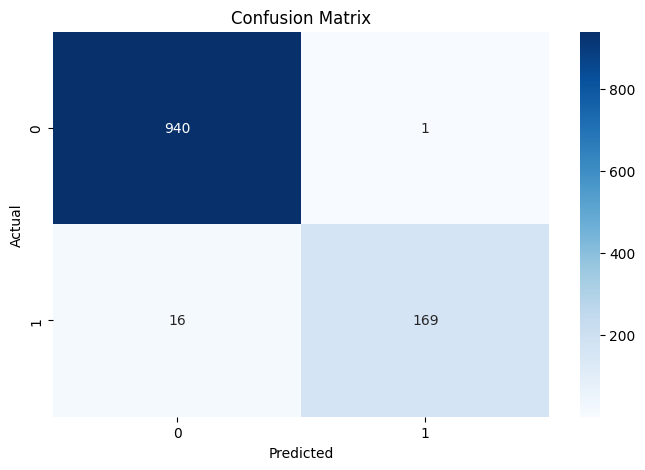

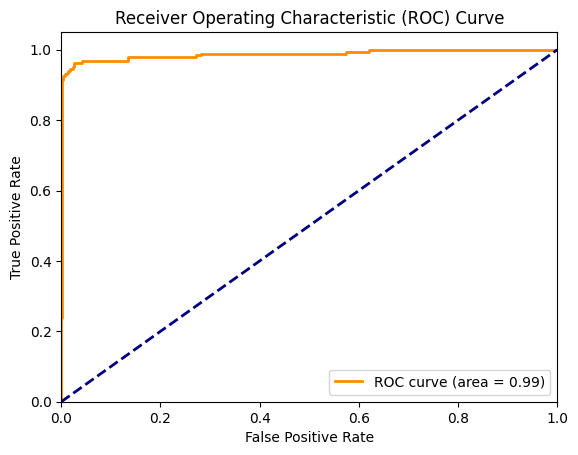

In [ ]:
from catboost import CatBoostClassifier
# Khởi tạo mô hình CatBoost
catboost = CatBoostClassifier(iterations=1000,  # số lượng cây quyết định (trees) sẽ xây dựng
                              learning_rate=0.1,  # tỷ lệ học tập
                              depth=6,  # độ sâu của mỗi cây
                              loss_function='Logloss',  # hàm mất mát
                              eval_metric='Accuracy',  # độ đo đánh giá mô hình
                              random_seed=42,  # seed để tái sản sinh kết quả
                              verbose=100)  # in thông tin sau mỗi lần lặp

# Huấn luyện mô hình
catboost.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

# Dự đoán trên tập kiểm tra
y_pred = catboost.predict(X_test)  # Số nguyên: {0,1}
y_pred_prob = catboost.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho lớp dương tính, số lẻ

# Tính các chỉ số precision, recall, accuracy, và roc_auc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# In kết quả
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc * 100:.2f}%')

# Bảng đánh giá classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Ma trận nhầm lẫn (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính FPR, TPR cho đường cong ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Tính AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
# Khởi tạo Stratified KFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Khởi tạo các list để lưu kết quả cross-validation
acc_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []

# Chia dữ liệu và huấn luyện mô hình sử dụng Stratified KFold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Huấn luyện mô hình
    catboost.fit(X_train, y_train, eval_set=(X_test, y_test), plot=False)

    # Dự đoán trên tập kiểm tra
    y_pred = catboost.predict(X_test)
    y_pred_prob = catboost.predict_proba(X_test)[:, 1]

    # Tính các chỉ số đánh giá
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Lưu các kết quả vào list
    acc_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    roc_auc_scores.append(roc_auc)

# In kết quả trung bình của cross-validation
print(f'Average Accuracy: {np.mean(acc_scores) * 100:.2f}%')
print(f'Average Precision: {np.mean(precision_scores) * 100:.2f}%')
print(f'Average Recall: {np.mean(recall_scores) * 100:.2f}%')
print(f'Average ROC AUC Score: {np.mean(roc_auc_scores) * 100:.2f}%')

0:	learn: 0.8585702	test: 0.8507993	best: 0.8507993 (0)	total: 5.95ms	remaining: 5.94s
100:	learn: 0.9684725	test: 0.9396092	best: 0.9396092 (83)	total: 449ms	remaining: 4s
200:	learn: 0.9931172	test: 0.9600355	best: 0.9600355 (196)	total: 892ms	remaining: 3.54s
300:	learn: 0.9986679	test: 0.9715808	best: 0.9715808 (246)	total: 1.34s	remaining: 3.11s
400:	learn: 1.0000000	test: 0.9769094	best: 0.9769094 (374)	total: 1.78s	remaining: 2.66s
500:	learn: 1.0000000	test: 0.9777975	best: 0.9777975 (457)	total: 2.15s	remaining: 2.14s
600:	learn: 1.0000000	test: 0.9769094	best: 0.9786856 (516)	total: 2.61s	remaining: 1.73s
700:	learn: 1.0000000	test: 0.9777975	best: 0.9786856 (516)	total: 3.29s	remaining: 1.41s
800:	learn: 1.0000000	test: 0.9786856	best: 0.9786856 (516)	total: 4.01s	remaining: 997ms
900:	learn: 1.0000000	test: 0.9786856	best: 0.9786856 (516)	total: 4.98s	remaining: 547ms
999:	learn: 1.0000000	test: 0.9795737	best: 0.9795737 (913)	total: 6.31s	remaining: 0us

bestTest = 0.97957

0:	learn: 0.8577265	total: 8.73ms	remaining: 8.72s
100:	learn: 0.9683837	total: 738ms	remaining: 6.57s
200:	learn: 0.9920071	total: 1.63s	remaining: 6.48s
300:	learn: 1.0000000	total: 2.1s	remaining: 4.89s
400:	learn: 1.0000000	total: 2.84s	remaining: 4.24s
500:	learn: 1.0000000	total: 3.62s	remaining: 3.61s
600:	learn: 1.0000000	total: 4.54s	remaining: 3.01s
700:	learn: 1.0000000	total: 5.34s	remaining: 2.28s
800:	learn: 1.0000000	total: 6.31s	remaining: 1.57s
900:	learn: 1.0000000	total: 7.2s	remaining: 792ms
999:	learn: 1.0000000	total: 7.82s	remaining: 0us


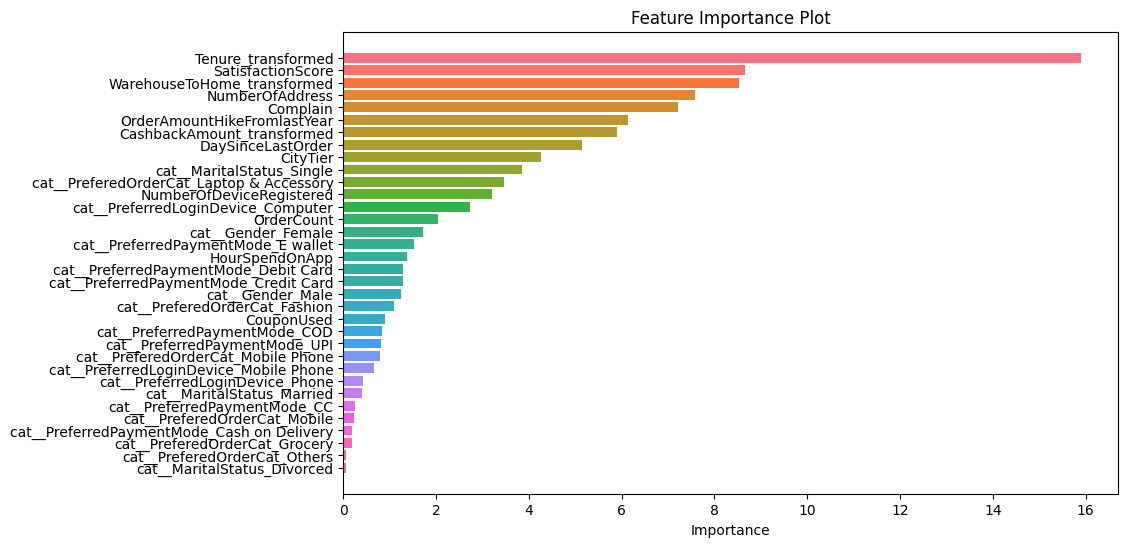

In [ ]:
from catboost import CatBoostClassifier, Pool, cv
import matplotlib.pyplot as plt

# Initialize CatBoost model
catboost = CatBoostClassifier(iterations=1000,
                              learning_rate=0.1,
                              depth=6,
                              loss_function='Logloss',
                              eval_metric='Accuracy',
                              random_seed=42,
                              verbose=100)

# Train the model on the entire dataset
catboost.fit(X, y, plot=False)

# Get feature importance
feature_importance = catboost.get_feature_importance()

# Get names of independent variables (features)
features = X.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort indices in descending order
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Use a palette for plotting (e.g., Husl palette)
palette = sns.color_palette("husl", n_colors=len(sorted_features))

# Plot horizontal bar chart with colored bars
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_features)), sorted_importance, color=palette)
plt.yticks(range(len(sorted_features)), sorted_features)
plt.title("Feature Importance Plot")
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top

# Show plot
plt.show()


Mô hình CatBoost cho thấy khả năng dự báo tốt vượt trội so với RandomForest, dù là trên tập Kfold. Các yếu tố quan trọng cũng cho ra kết quả gần tương tự RandomForest.

**Phân Tích Các Tính Năng Quan Trọng**
1.	Tenure:
- Mô hình hành vi: Khách hàng có thời gian gắn bó ngắn hơn có khả năng rời bỏ cao hơn. Điều này cho thấy rằng khách hàng mới không tìm thấy đủ giá trị để tiếp tục sử dụng dịch vụ của tổ chức.
- Gợi ý: Triển khai chương trình chào đón hoặc chương trình khách hàng thân thiết cho khách hàng mới để tăng cường sự tương tác và hài lòng ngay từ đầu. Cung cấp dịch vụ tư vấn cá nhân hóa và kiểm tra định kỳ để giúp khách hàng mới cảm thấy được quan tâm.
2.	CashbackAmount:
- Mô hình hành vi: Khách hàng có số tiền hoàn lại thấp hơn trong tháng trước có khả năng rời bỏ cao hơn. Điều này cho thấy các ưu đãi tài chính như hoàn tiền đóng vai trò quan trọng trong việc giữ chân khách hàng.
- Gợi ý: Tăng cường các chương trình hoàn tiền hoặc cung cấp các ưu đãi tài chính khác cho khách hàng, đặc biệt là những khách hàng có nguy cơ rời bỏ. Các ưu đãi cá nhân hóa dựa trên thói quen chi tiêu cũng có thể giúp giữ chân khách hàng.
3.	WarehouseToHome:
- Mô hình hành vi: Khách hàng ở xa kho hàng có khả năng rời bỏ cao hơn. Điều này có thể do thời gian giao hàng lâu hơn hoặc chi phí giao hàng cao hơn.
- Gợi ý: Cải thiện logistics và các tùy chọn giao hàng cho khách hàng ở xa. Xem xét cung cấp giao hàng miễn phí hoặc giảm giá cho những khách hàng này, hoặc mở thêm các kho hàng để giảm thời gian giao hàng.
4.	Complain:
- Mô hình hành vi: Khách hàng đã gửi khiếu nại trong tháng trước có khả năng rời bỏ cao hơn. Điều này chỉ ra sự không hài lòng với dịch vụ.
- Gợi ý: Nâng cao trải nghiệm dịch vụ khách hàng bằng cách xử lý nhanh chóng và giải quyết các khiếu nại. Triển khai một hệ thống phản hồi mạnh mẽ để hiểu rõ các vấn đề phổ biến và chủ động giải quyết chúng.
5.	SatisfactionScore:
- Mô hình hành vi: Khách hàng có điểm hài lòng thấp hơn có khả năng rời bỏ cao hơn. Đây là chỉ số trực tiếp về sự không hài lòng của khách hàng.
- Gợi ý: Thường xuyên đo lường sự hài lòng của khách hàng và hành động dựa trên phản hồi. Triển khai các chương trình để cải thiện trải nghiệm tổng thể của khách hàng, như dịch vụ cá nhân hóa, hỗ trợ tốt hơn và sản phẩm chất lượng cao hơn.
6.	NumberOfAddress:
- Mô hình hành vi: Khách hàng có nhiều địa chỉ hơn có khả năng rời bỏ thấp hơn. Điều này có thể chỉ ra rằng khách hàng với nhiều địa chỉ có sự gắn bó cao hơn hoặc có sự tin tưởng cao hơn vào dịch vụ.
- Gợi ý: Khuyến khích khách hàng thêm nhiều địa chỉ bằng cách nhấn mạnh lợi ích về sự linh hoạt và tiện lợi. Cung cấp các chương trình khuyến mãi hoặc giảm giá cho người dùng thêm nhiều địa chỉ.
**Gợi Ý Để Giảm Tỷ Lệ Rời Bỏ**
Dựa trên phân tích trên, dưới đây là một số gợi ý cụ thể cho công ty:
1.	Nâng Cao Trải Nghiệm Khách Hàng Mới:
- Cung cấp trải nghiệm chào đón cá nhân hóa cho khách hàng mới.
- Đưa ra các chương trình giảm giá ban đầu, ưu đãi độc quyền và phần thưởng để khuyến khích sự tương tác sớm.
2.	Tăng Cường Ưu Đãi Tài Chính:
- Triển khai các chương trình hoàn tiền theo bậc để thưởng cho sự trung thành và chi tiêu cao hơn.
- Cung cấp các chương trình khuyến mãi và giảm giá mục tiêu dựa trên hành vi và sở thích của khách hàng.
3.	Cải Thiện Logistics và Giao Hàng:
- Tối ưu hóa các tuyến giao hàng và xem xét mở thêm các kho hàng để giảm thời gian giao hàng.
- Cung cấp các tùy chọn giao hàng miễn phí hoặc giảm giá, đặc biệt cho những khách hàng ở xa.
4.	Dịch Vụ Khách Hàng Chủ Động:
- Triển khai một hệ thống để xử lý và giải quyết khiếu nại của khách hàng nhanh chóng.
- Theo dõi khách hàng sau khiếu nại để đảm bảo sự hài lòng và ngăn ngừa các vấn đề tương lai.
5.	Phản Hồi Khách Hàng Định Kỳ:
- Thực hiện các khảo sát hài lòng định kỳ và phân tích kết quả để xác định các lĩnh vực cần cải thiện.
- Hành động dựa trên phản hồi để nâng cao trải nghiệm tổng thể của khách hàng.
6.	Khuyến Khích Sự Tương Tác:
- Khuyến khích khách hàng thêm nhiều địa chỉ bằng cách giải thích lợi ích và cung cấp các ưu đãi nhỏ.
- Tạo các chương trình khuyến khích mua lại và tương tác liên tục, như chương trình khách hàng thân thiết và dịch vụ đăng ký.
Bằng cách tập trung vào những lĩnh vực này, công ty có thể giải quyết các vấn đề cụ thể dẫn đến việc khách hàng rời bỏ và nâng cao tỷ lệ giữ chân khách hàng tổng thể.
